**LabDS03a**

Considerieng several variables corresponding to international indicator. The purpose of this study is creating a model to explain the Co2 emissions.



1. Import data 

Import data and create new varible (discretize variable)

In [3]:
import pandas as pd
import numpy as np

In [4]:
url='Mundo94Var.xls'
df=pd.read_excel(url)

In [5]:
#em que medida estes fatores/variáveis estão teoricamente relacionadas
#primeiro importar os dados e definir um novo dataframe
XY=df[['CO2 emissions (metric tons per capita)',
        'Urban population (% of total population)',
        'Population density (people per sq. km of land area)',
        'Secure Internet servers (per 1 million people)',
        'Mobile cellular subscriptions (per 100 people)',
        'Life expectancy at birth, total (years)',
        'Access to electricity (% of population)'
       ]]
#apagar todas as linhas que tenham pelo menos um registo sem dados 
XY=XY.dropna()
#definir como target as emissões
Y=XY['CO2 emissions (metric tons per capita)']
#retirar a parte das emissões das features uma vez que vai ser o nosso XY 
Xfeatures=XY.drop(['CO2 emissions (metric tons per capita)'],axis=1)

2. Correlation data

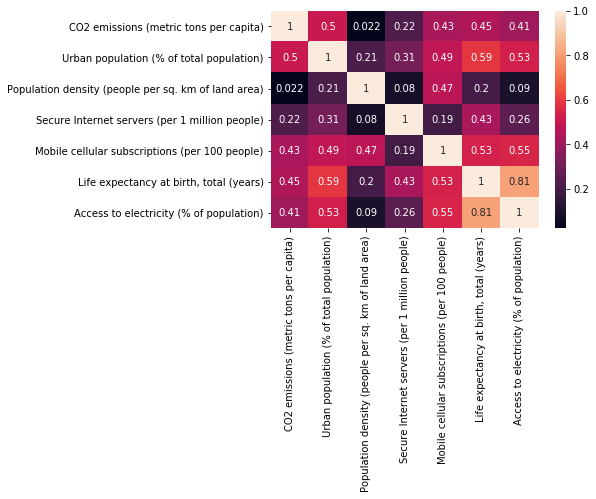

In [7]:
#analisar a correlação entre os dados
#correlação positiva - boa relação entre as variáveis dependentes e as variáveis independentes mas uma baixa correlação entre as variáveis independentes (features) 
XY.corr()
#seaborn - para fazer gráficos mais apelativos
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = XY.corr()
#heatmap - valores próximos de 1 mais escuros e menos próximos mais claros
#eliminar os valores mais claros 
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [5]:
#análise de dados que obtivemos
#r-square - não é grade coisa
#coef - peso do coeficiente (ex. população urbana tem um peso positivo reduzido na população total; quantos mais telemóveis mais emissões; quanto mais emissões, menor será a esperança média de vida)
#niveis de significância (P>|t|) quanto mais baixos melhor
import statsmodels.api as sm
model = sm.OLS(Y, Xfeatures)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared (uncentered):                   0.572
Model:                                                OLS   Adj. R-squared (uncentered):              0.558
Method:                                     Least Squares   F-statistic:                              39.91
Date:                                    Sun, 22 Nov 2020   Prob (F-statistic):                    1.36e-30
Time:                                            16:03:54   Log-Likelihood:                         -558.76
No. Observations:                                     185   AIC:                                      1130.
Df Residuals:                                         179   BIC:                                      1149.
Df Model:                                               6                                                  
Covariance Type:                                nonrobust                                                  
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Urban population (% of total population)                0.0924      0.020      4.552      0.000       0.052       0.132
Population density (people per sq. km of land area)    -0.0007      0.000     -2.656      0.009      -0.001      -0.000
Secure Internet servers (per 1 million people)          0.0001    7.4e-05      1.400      0.163   -4.24e-05       0.000
Mobile cellular subscriptions (per 100 people)          0.0456      0.013      3.448      0.001       0.020       0.072
Life expectancy at birth, total (years)                -0.1128      0.026     -4.320      0.000      -0.164      -0.061
Access to electricity (% of population)                 0.0299      0.021      1.402      0.163      -0.012       0.072
==============================================================================
Omnibus:                      143.626   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.387
Skew:                           2.911   Prob(JB):                         0.00
Kurtosis:                      15.841   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#vais ver os que têm a significância com níveis muito elevados e eliminá-los
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# feature extraction
model = LinearRegression()
#vou dizer que quero as 5 melhores variáveis 
rfe = RFE(model, 5)
fit = rfe.fit(Xfeatures, Y)

print("Num Features: %d" % fit.n_features_) #quais as features que eu quero
print("Selected Features: %s" % fit.support_) #quais as features que vão seer selecionadas
print("Feature Ranking: %s" % fit.ranking_) #ranking 

Num Features: 5
Selected Features: [ True  True False  True  True  True]
Feature Ranking: [1 1 2 1 1 1]
